<a href="https://colab.research.google.com/github/Henry1725/PYTHON/blob/main/TESIS_HENRY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multicausalidad entre los Créditos Bancarios, Créditos de Financieras y Créditos de Cajas Municipales en el Perú (2015-2019): Una aproximación SVAR <br>
Por: Henry Luna

In [ ]:
#IMPORTACION DE PAQUETES
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<p> Especificación del Modelo

Modelo Estático: $cb_t = f(cf_t, ccm_t)$ ... (1)<br>
Modelo Dinámico: $cb_t = f(cf_{t-1}, ccm_{t-1})$ ... (2)<br>
Modelo Dinámico Multiecuacional: <br>
$cb_t = f(cb_{t-1},cf_{t-1}, ccm_{t-1})$ ... (3a)<br>
$cf_t = f(cb_{t-1}.cf_{t-1}, ccm_{t-1})$ ... (3b)<br>
$cm_t = f(cb_{t-1},cf_{t-1}, ccm_{t-1})$ ... (3c)<br>



In [ ]:
#IMPORTACION DE DATOS
from google.colab import files
load=files.upload()

Saving DataTrabajo1.xlsx to DataTrabajo1 (1).xlsx


In [ ]:
data=pd.read_excel(load["DataTrabajo1.xlsx"])

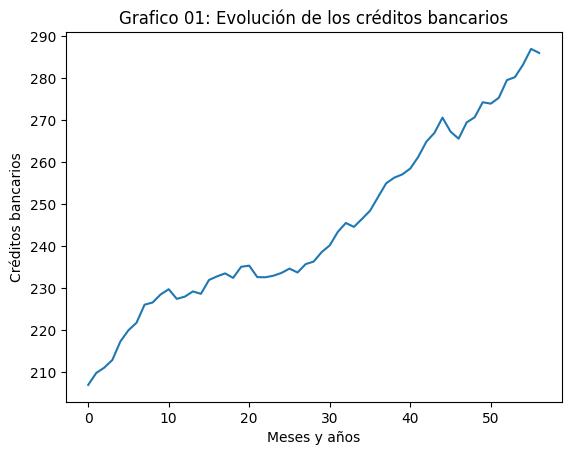

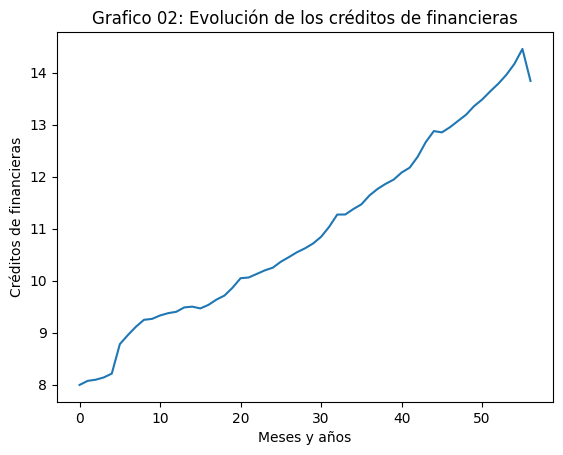

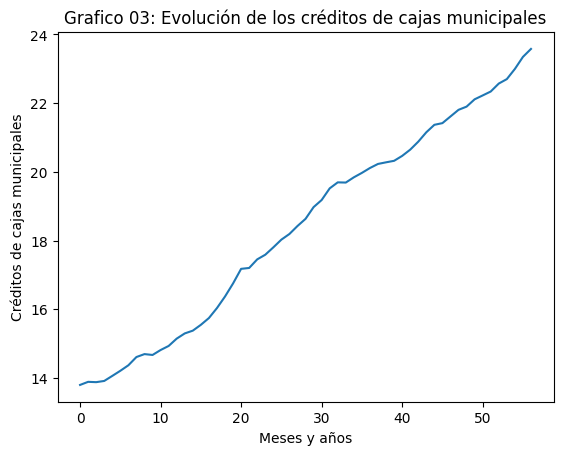

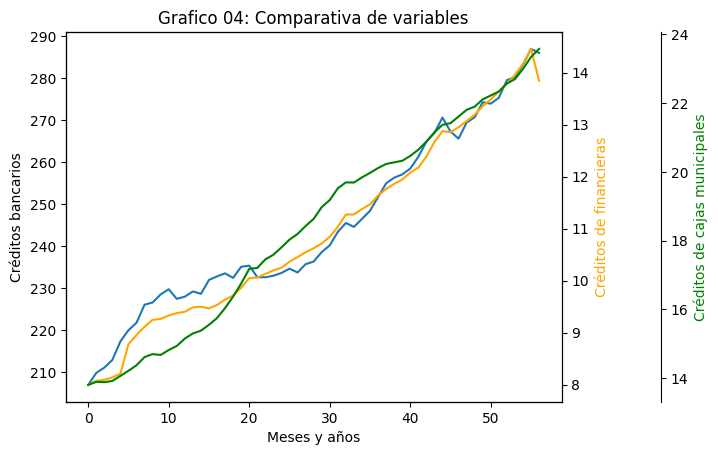

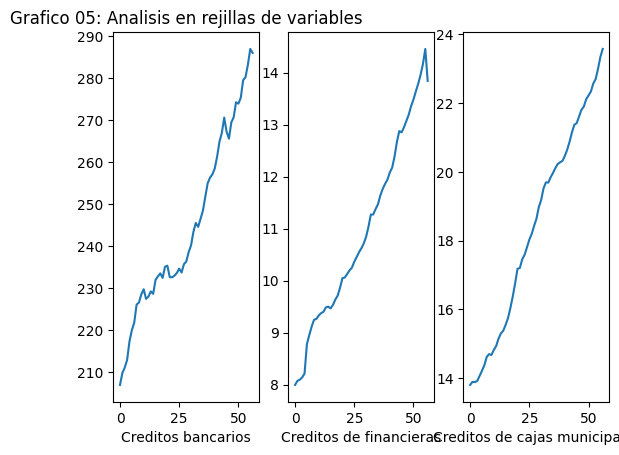

In [ ]:
from pandas.core.arrays.masked import nanops
#ORDENANDO VARIABLES
bancario = np.array(data["CB"])/1000000
financiera = np.array(data["CF"])/1000000
cmunicipales = np.array(data["CM"])/1000000

#Crear la variable de tiempo en unidades temporales

plt.plot(bancario)
plt.title("Grafico 01: Evolución de los créditos bancarios")
plt.xlabel("Meses y años")
plt.ylabel("Créditos bancarios")
plt.savefig("Grafico_01.png")
plt.show()

plt.plot(financiera)
plt.title("Grafico 02: Evolución de los créditos de financieras")
plt.xlabel("Meses y años")
plt.ylabel("Créditos de financieras")
plt.savefig("Grafico_02.png")
plt.show()

plt.plot(cmunicipales)
plt.title("Grafico 03: Evolución de los créditos de cajas municipales")
plt.xlabel("Meses y años")
plt.ylabel("Créditos de cajas municipales")
plt.savefig("Grafico_03.png")
plt.show()

len(bancario)
#implementar graficos con segundo eje Y cuando el segundo eje tiene similares unidades

fig,ax=plt.subplots()
ax.plot(bancario)
ax.set_title("Grafico 04: Comparativa de variables")
ax.set_xlabel("Meses y años")
ax.set_ylabel("Créditos bancarios")
ax2=ax.twinx()
ax2.plot(financiera, color="orange")
ax2.set_ylabel("Créditos de financieras", color="orange")
ax3=ax.twinx()
ax3.spines.right.set_position(("axes",1.2))
ax3.plot(cmunicipales, color="green")
ax3.set_ylabel("Créditos de cajas municipales", color="green")
#plt.legend(["bancario","financieras","cajas municipales"])
plt.show()
fig.savefig("Grafico_04")

#implementar grafico con tres ejes y (CODIGO REDUNDANTE CON EL ANTERIOR)

#fig,ax=plt.subplots()
#ax1=ax.twinx()
#ax2=ax.twinx()
#ax2.spines.right.set_position(("axes",1.2))
#plot1,=ax.plot(bancario)
#plot2,=ax1.plot(financiera)
#plot3,=ax2.plot(cmunicipales)
#ax.set_xlabel("Meses y años")
#ax.set_ylabel("Creditos bancarios")
#ax1.set_ylabel("Creditos de financieras")
#ax2.set_ylabel("Creditos de caja municipales")
#ax.legend(handles=[plot1,plot2,plot3])
#plt.show()
#fig.savefig("Creditos1C")

#Implementar grafico en rejillas
plt.subplot(131)
plt.plot(bancario)
plt.title("Grafico 05: Analisis en rejillas de variables")
plt.xlabel("Creditos bancarios")
plt.subplot(132)
plt.plot(financiera)
plt.xlabel("Creditos de financieras")
plt.subplot(133)
plt.plot(cmunicipales)
plt.xlabel("Creditos de cajas municipales")
#plt.suptitle("Grafico5")
plt.savefig("Grafico_05")
plt.show()


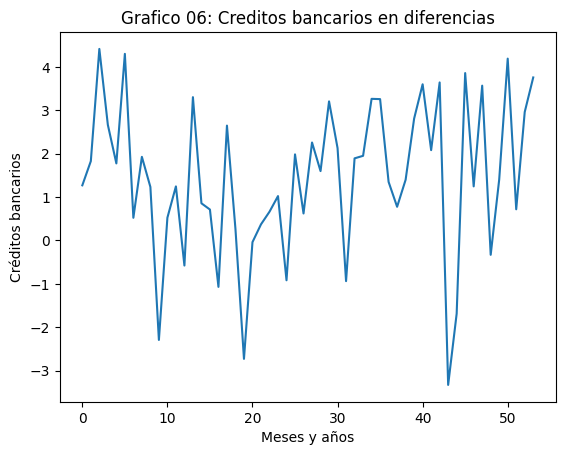

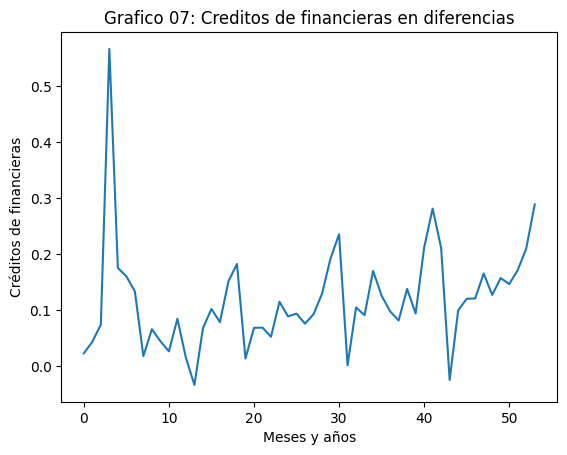

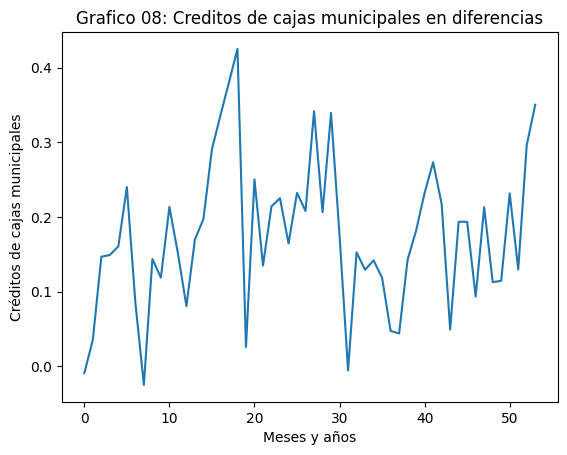

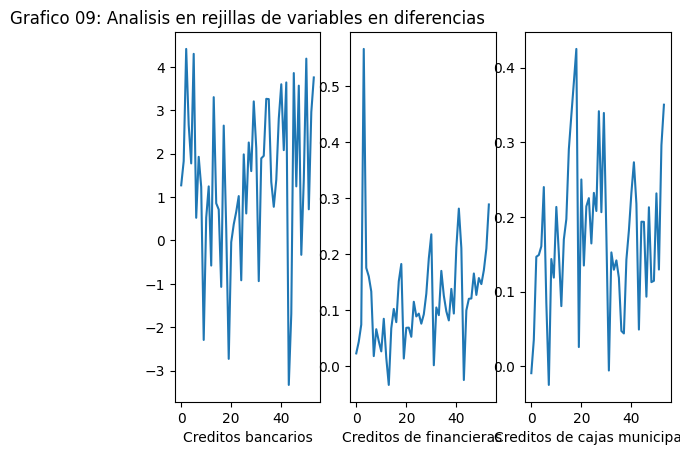

In [ ]:
#VARIABLES EN DIFERENCIAS
# 1.BANCARIO
dbancario = np.zeros(56)
for t in range(56):
  t1=t-1
  dbancario[t] = bancario[t] - bancario[t1]
#plt.plot(dbancario[2:56])
#plt.show()

# 2.FINANCIERA
dfinanciera = np.zeros(56)
for t in range(56):
  t1=t-1
  dfinanciera[t] = financiera[t] - financiera[t1]
#plt.plot(dfinanciera[2:56])
#plt.show()

# 3.CAJAS MUNICIPALES
dcmunicipales = np.zeros(56)
for t in range(56):
  t1=t-1
  dcmunicipales[t] = cmunicipales[t] - cmunicipales[t1]
#plt.plot(dcmunicipales[2:56])
#plt.show()
#implementar graficos en rejillas
#incluir titulo y leyenda

plt.plot(dbancario[2:56])
plt.title("Grafico 06: Creditos bancarios en diferencias")
plt.xlabel("Meses y años")
plt.ylabel("Créditos bancarios")
plt.savefig("Grafico_06.png")
plt.show()

plt.plot(dfinanciera[2:56])
plt.title("Grafico 07: Creditos de financieras en diferencias")
plt.xlabel("Meses y años")
plt.ylabel("Créditos de financieras")
plt.savefig("Grafico_07.png")
plt.show()

plt.plot(dcmunicipales[2:56])
plt.title("Grafico 08: Creditos de cajas municipales en diferencias")
plt.xlabel("Meses y años")
plt.ylabel("Créditos de cajas municipales")
plt.savefig("Grafico_08.png")
plt.show()


plt.subplot(131)
plt.title("Grafico 09: Analisis en rejillas de variables en diferencias")
plt.plot(dbancario[2:56])
plt.xlabel("Creditos bancarios")
plt.subplot(132)
plt.plot(dfinanciera[2:56])
plt.xlabel("Creditos de financieras")
plt.subplot(133)
plt.plot(dcmunicipales[2:56])
plt.xlabel("Creditos de cajas municipales")
#plt.suptitle("Grafico2A")
plt.savefig("Grafico_09")
plt.show()

206.94161 1.4132873035714282


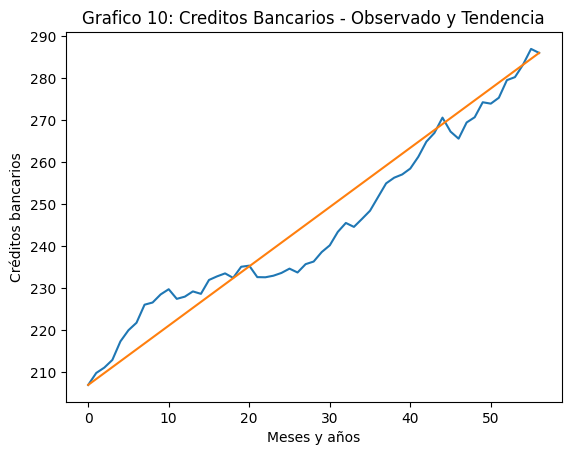

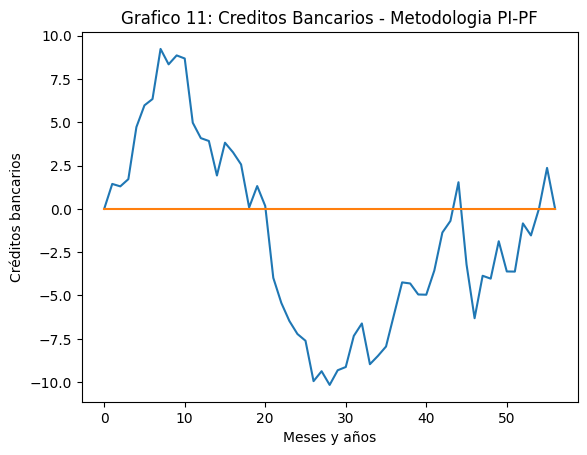

[  0.           1.4389337    1.29787239   1.71464509   4.72030879
   5.97439648   6.33891518   9.23092188   8.34100457   8.85721827
   8.67844396   4.97042666   4.08264336   3.91699005   1.92513475
   3.81801245   3.26220014   2.56250984   0.07856754   1.31521623
   0.16407493  -3.98059837  -5.43220568  -6.47346498  -7.22355129
  -7.61289759  -9.94451489  -9.3718332  -10.1622955   -9.3154158
  -9.12852411  -7.33344941  -6.61524571  -8.96673002  -8.48555132
  -7.94594662  -6.09189993  -4.24407323  -4.30620854  -4.94248784
  -4.95543914  -3.55714645  -1.36689875  -0.69641705   1.53616064
  -3.20956466  -6.31117496  -3.86247527  -4.02796257  -1.86960587
  -3.61392118  -3.62119148  -0.83960079  -1.53359209   0.01705861
   2.3647373    0.        ]


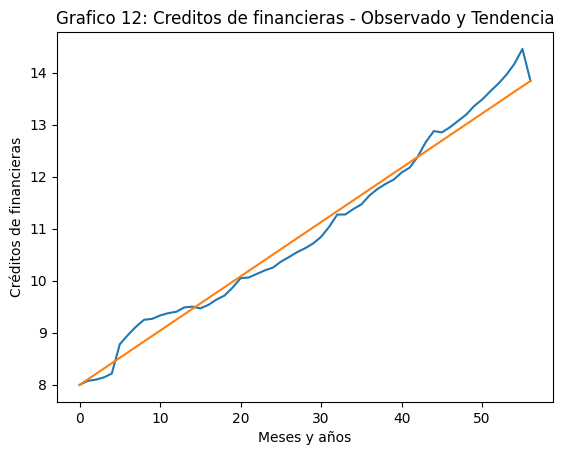

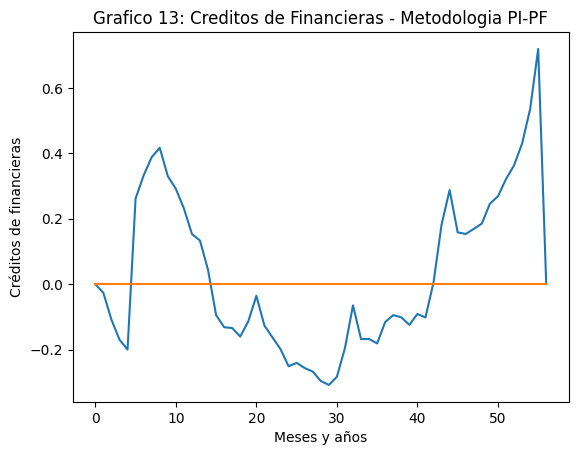

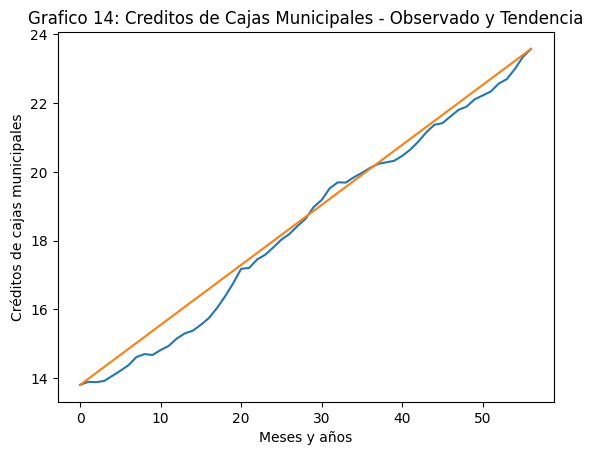

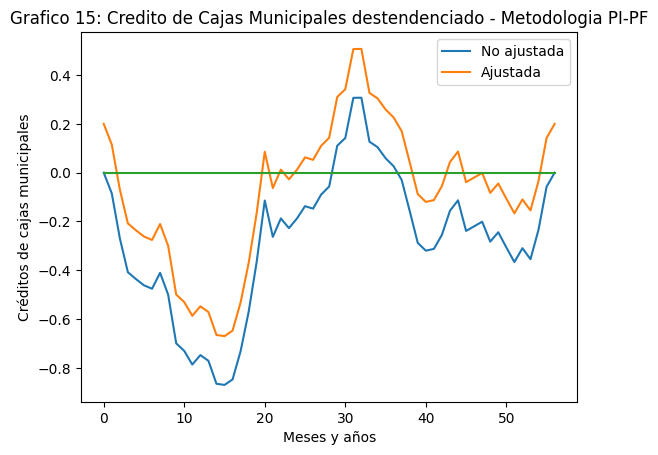

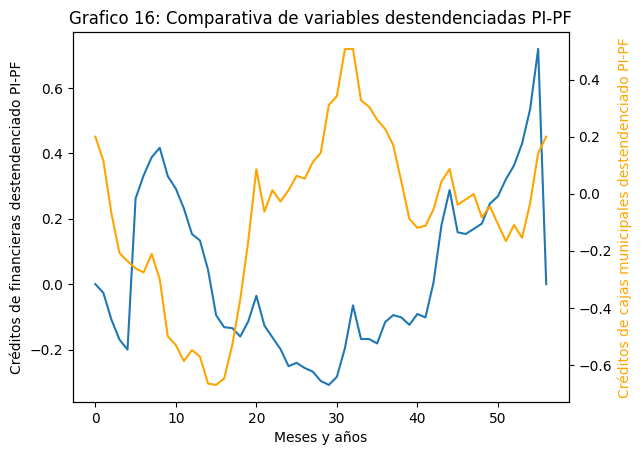

In [ ]:
#QUITANDO LA TENDENCIA A LAS VARIABLES METODOLOGIA PUNTO INICIAL-PUNTO FINAL
ejecero=np.zeros(57)
tiempo = np.arange(57)

# 1.BANCARIO
c2b=(bancario[56]-bancario[0])/(tiempo[56]-tiempo[0])
c1b=bancario[0]
bancariot=c1b+c2b*tiempo
print(c1b,c2b)

plt.plot(bancario)
plt.plot(bancariot)
plt.title("Grafico 10: Creditos Bancarios - Observado y Tendencia")
plt.xlabel("Meses y años")
plt.ylabel("Créditos bancarios")
plt.savefig("Grafico_10.png")
plt.show()

bancariodt=bancario-bancariot
plt.plot(bancariodt)
plt.plot(ejecero)
plt.title("Grafico 11: Creditos Bancarios - Metodologia PI-PF")
plt.xlabel("Meses y años")
plt.ylabel("Créditos bancarios")
plt.savefig("Grafico_11.png")
plt.show()
print(bancariodt)

# 1.FINANCIERA
c2f=(financiera[56]-financiera[0])/(tiempo[56]-tiempo[0])
c1f=financiera[0]
financierat=c1f+c2f*tiempo

plt.plot(financiera)
plt.plot(financierat)
plt.title("Grafico 12: Creditos de financieras - Observado y Tendencia")
plt.xlabel("Meses y años")
plt.ylabel("Créditos de financieras")
plt.savefig("Grafico_12.png")
plt.show()

financieradt=financiera-financierat
plt.plot(financieradt)
plt.plot(ejecero)
plt.title("Grafico 13: Creditos de Financieras - Metodologia PI-PF")
plt.xlabel("Meses y años")
plt.ylabel("Créditos de financieras")
plt.savefig("Grafico_13.png")
plt.show()

# 1.CMUNICIPALES
c2c=(cmunicipales[56]-cmunicipales[0])/(tiempo[56]-tiempo[0])
c1c=cmunicipales[0]
cmunicipalest=c1c+c2c*tiempo

plt.plot(cmunicipales)
plt.plot(cmunicipalest)
plt.title("Grafico 14: Creditos de Cajas Municipales - Observado y Tendencia")
plt.xlabel("Meses y años")
plt.ylabel("Créditos de cajas municipales")
plt.savefig("Grafico_14.png")
plt.show()

ajustec1c=-0.2
cmunicipalesdtc=cmunicipales-cmunicipalest-ajustec1c

cmunicipalesdt=cmunicipales-cmunicipalest
plt.plot(cmunicipalesdt)
plt.plot(cmunicipalesdtc)
plt.plot(ejecero)
plt.title("Grafico 15: Credito de Cajas Municipales destendenciado - Metodologia PI-PF")
plt.xlabel("Meses y años")
plt.ylabel("Créditos de cajas municipales")
plt.savefig("Grafico_15.png")
plt.legend(["No ajustada","Ajustada"])
plt.show()


fig,ax=plt.subplots()
ax.plot(financieradt)
ax.set_title("Grafico 16: Comparativa de variables destendenciadas PI-PF")
ax.set_xlabel("Meses y años")
ax.set_ylabel("Créditos de financieras destendenciado PI-PF")
ax2=ax.twinx()
ax2.plot(cmunicipalesdtc, color="orange")
ax2.set_ylabel("Créditos de cajas municipales destendenciado PI-PF", color="orange")
plt.show()
fig.savefig("Grafico_16")




In [ ]:
print(bancariodt)

[  0.           1.4389337    1.29787239   1.71464509   4.72030879
   5.97439648   6.33891518   9.23092188   8.34100457   8.85721827
   8.67844396   4.97042666   4.08264336   3.91699005   1.92513475
   3.81801245   3.26220014   2.56250984   0.07856754   1.31521623
   0.16407493  -3.98059837  -5.43220568  -6.47346498  -7.22355129
  -7.61289759  -9.94451489  -9.3718332  -10.1622955   -9.3154158
  -9.12852411  -7.33344941  -6.61524571  -8.96673002  -8.48555132
  -7.94594662  -6.09189993  -4.24407323  -4.30620854  -4.94248784
  -4.95543914  -3.55714645  -1.36689875  -0.69641705   1.53616064
  -3.20956466  -6.31117496  -3.86247527  -4.02796257  -1.86960587
  -3.61392118  -3.62119148  -0.83960079  -1.53359209   0.01705861
   2.3647373    0.        ]


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1104.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           4.38e-38
Time:                        23:41:35   Log-Likelihood:                -168.03
No. Observations:                  57   AIC:                             340.1
Df Residuals:                      55   BIC:                             344.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        209.7547      1.228    170.817      0.0

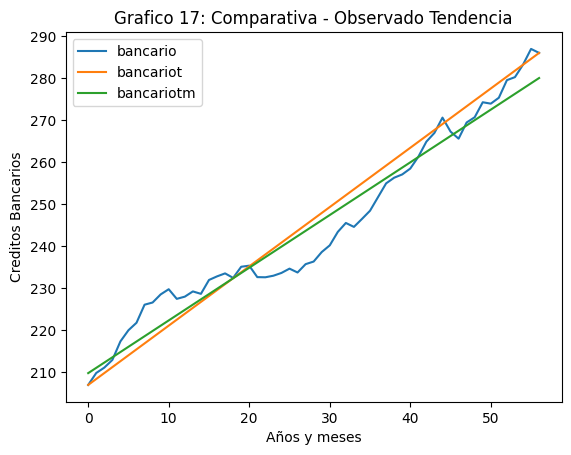

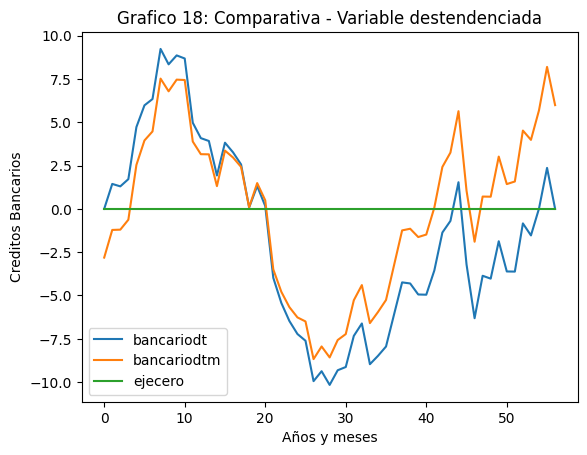

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     3182.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           2.31e-50
Time:                        23:41:35   Log-Likelihood:                 2.0300
No. Observations:                  57   AIC:                          -0.06001
Df Residuals:                      55   BIC:                             4.026
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9219      0.062    127.460      0.0

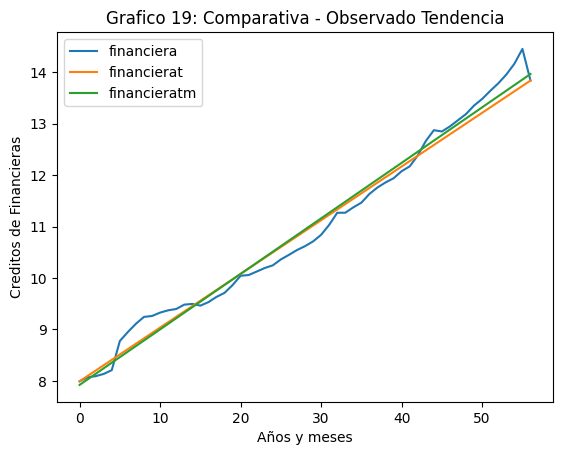

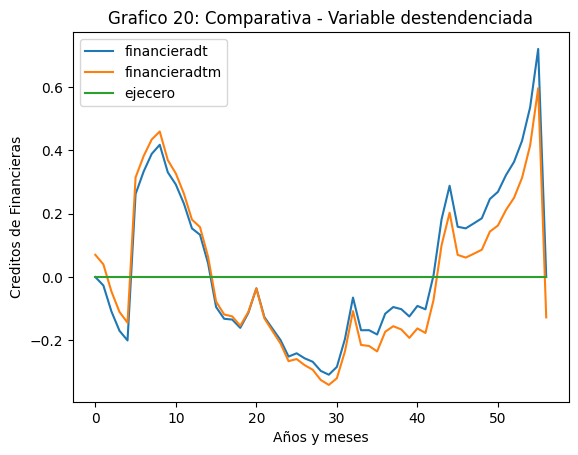

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     7242.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           4.52e-60
Time:                        23:41:36   Log-Likelihood:                -4.2711
No. Observations:                  57   AIC:                             12.54
Df Residuals:                      55   BIC:                             16.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3185      0.069    191.862      0.0

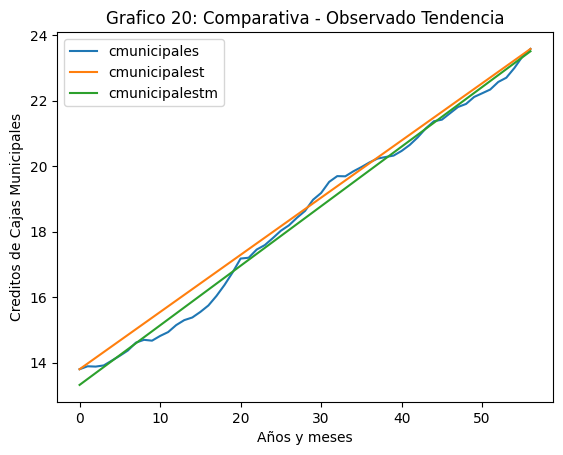

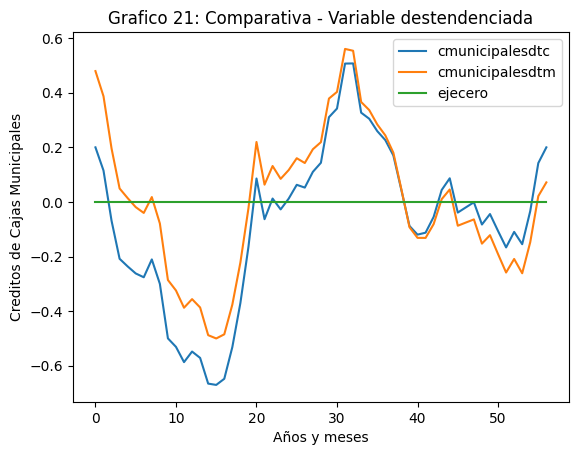

[  0.           1.4389337    1.29787239   1.71464509   4.72030879
   5.97439648   6.33891518   9.23092188   8.34100457   8.85721827
   8.67844396   4.97042666   4.08264336   3.91699005   1.92513475
   3.81801245   3.26220014   2.56250984   0.07856754   1.31521623
   0.16407493  -3.98059837  -5.43220568  -6.47346498  -7.22355129
  -7.61289759  -9.94451489  -9.3718332  -10.1622955   -9.3154158
  -9.12852411  -7.33344941  -6.61524571  -8.96673002  -8.48555132
  -7.94594662  -6.09189993  -4.24407323  -4.30620854  -4.94248784
  -4.95543914  -3.55714645  -1.36689875  -0.69641705   1.53616064
  -3.20956466  -6.31117496  -3.86247527  -4.02796257  -1.86960587
  -3.61392118  -3.62119148  -0.83960079  -1.53359209   0.01705861
   2.3647373    0.        ]


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
explicativas=sm.add_constant(tiempo)

#BANCARIO
modelob=sm.OLS(bancario,explicativas).fit()
print(modelob.summary())
print(modelob.params)
c1bm=modelob.params[0]
c2bm=modelob.params[1]
print(c1bm,c2bm)

bancariotm=c1bm+c2bm*tiempo

plt.plot(bancario)
plt.plot(bancariot)
plt.plot(bancariotm)
plt.title("Grafico 17: Comparativa - Observado Tendencia")
plt.ylabel("Creditos Bancarios")
plt.xlabel("Años y meses")
plt.legend(["bancario","bancariot","bancariotm"])
plt.savefig("Grafico_17")
plt.show()

bancariodtm=bancario-bancariotm
plt.plot(bancariodt)
plt.plot(bancariodtm)
plt.plot(ejecero)
plt.title("Grafico 18: Comparativa - Variable destendenciada")
plt.ylabel("Creditos Bancarios")
plt.xlabel("Años y meses")
plt.legend(["bancariodt","bancariodtm","ejecero"])
plt.savefig("Grafico_18")
plt.show()

#FINANCIERA
modelof=sm.OLS(financiera,explicativas).fit()
print(modelof.summary())
print(modelof.params)
c1fm=modelof.params[0]
c2fm=modelof.params[1]
print(c1fm,c2fm)

financieratm=c1fm+c2fm*tiempo

plt.plot(financiera)
plt.plot(financierat)
plt.plot(financieratm)
plt.title("Grafico 19: Comparativa - Observado Tendencia")
plt.ylabel("Creditos de Financieras")
plt.xlabel("Años y meses")
plt.legend(["financiera","financierat","financieratm"])
plt.savefig("Grafico_19")
plt.show()

financieradtm=financiera-financieratm
plt.plot(financieradt)
plt.plot(financieradtm)
plt.plot(ejecero)
plt.title("Grafico 20: Comparativa - Variable destendenciada")
plt.ylabel("Creditos de Financieras")
plt.xlabel("Años y meses")
plt.legend(["financieradt","financieradtm","ejecero"])
plt.savefig("Grafico_20")
plt.show()

#CAJAS MUNICIPALES
modeloc=sm.OLS(cmunicipales,explicativas).fit()
print(modeloc.summary())
print(modeloc.params)
c1cm=modeloc.params[0]
c2cm=modeloc.params[1]
print(c1cm,c2cm)

cmunicipalestm=c1cm+c2cm*tiempo

plt.plot(cmunicipales)
plt.plot(cmunicipalest)
plt.plot(cmunicipalestm)
plt.title("Grafico 20: Comparativa - Observado Tendencia")
plt.ylabel("Creditos de Cajas Municipales")
plt.xlabel("Años y meses")
plt.legend(["cmunicipales","cmunicipalest","cmunicipalestm"])
plt.savefig("Grafico_20")
plt.show()

cmunicipalesdtm=cmunicipales-cmunicipalestm
plt.plot(cmunicipalesdtc)
plt.plot(cmunicipalesdtm)
plt.plot(ejecero)
plt.title("Grafico 21: Comparativa - Variable destendenciada")
plt.ylabel("Creditos de Cajas Municipales")
plt.xlabel("Años y meses")
plt.legend(["cmunicipalesdtc","cmunicipalesdtm","ejecero"])
plt.savefig("Grafico_21")
plt.show()

print(bancariodt)


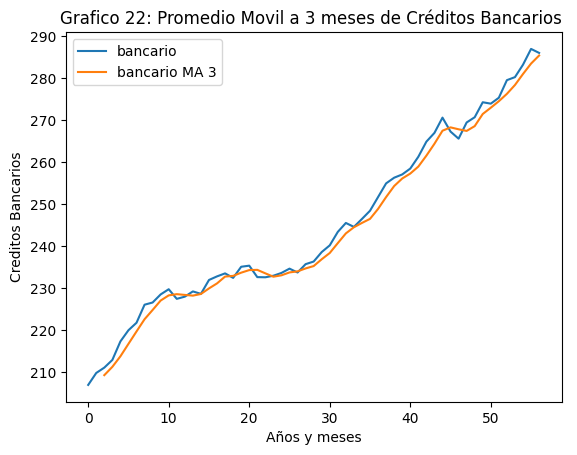

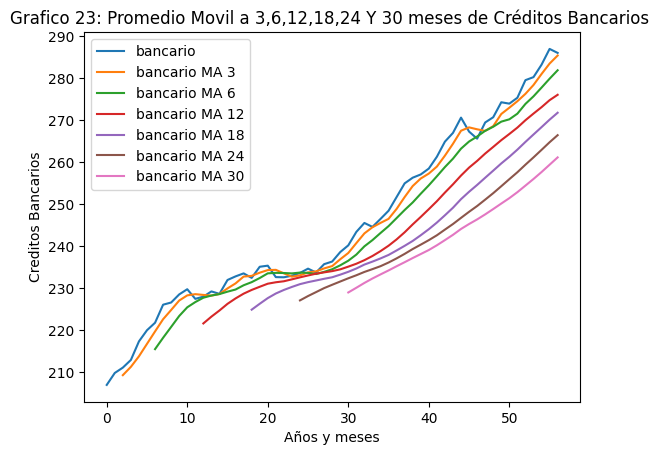

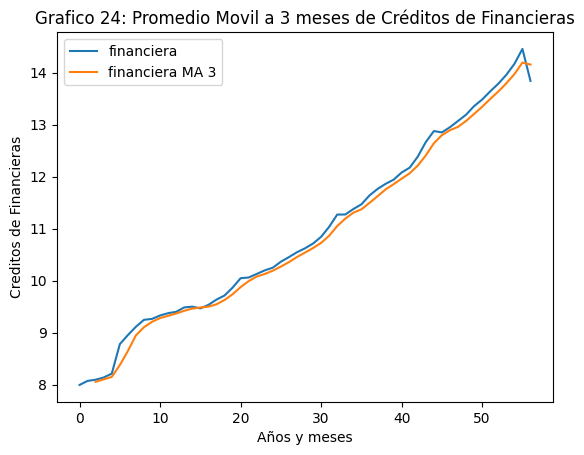

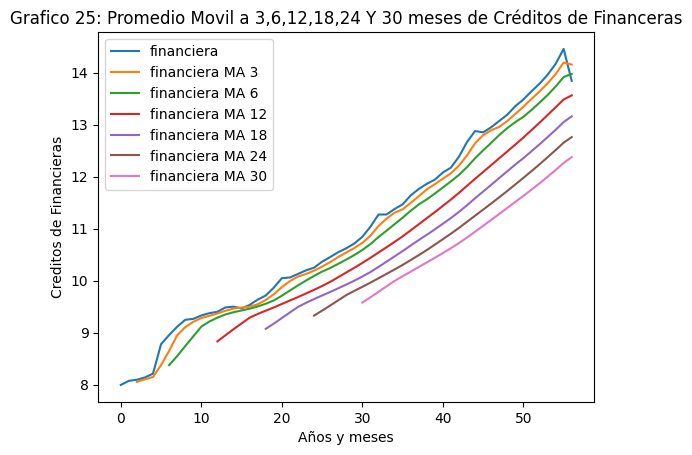

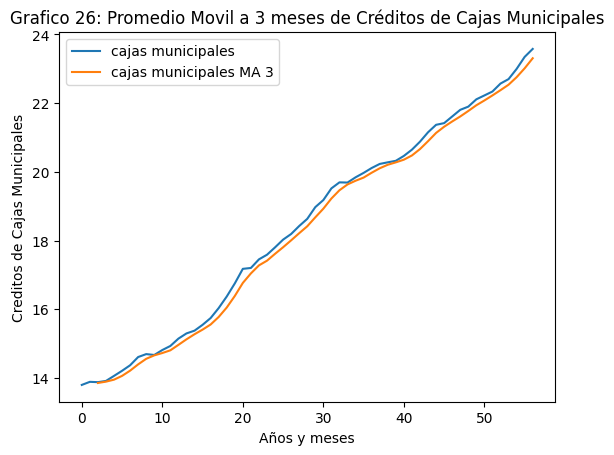

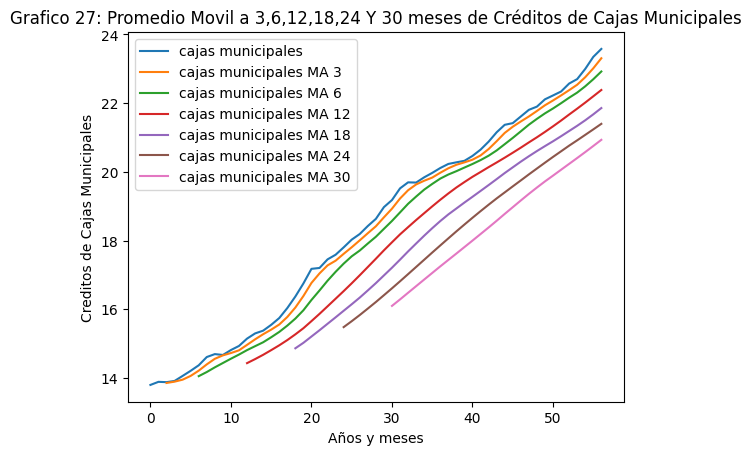

[  0.           1.4389337    1.29787239   1.71464509   4.72030879
   5.97439648   6.33891518   9.23092188   8.34100457   8.85721827
   8.67844396   4.97042666   4.08264336   3.91699005   1.92513475
   3.81801245   3.26220014   2.56250984   0.07856754   1.31521623
   0.16407493  -3.98059837  -5.43220568  -6.47346498  -7.22355129
  -7.61289759  -9.94451489  -9.3718332  -10.1622955   -9.3154158
  -9.12852411  -7.33344941  -6.61524571  -8.96673002  -8.48555132
  -7.94594662  -6.09189993  -4.24407323  -4.30620854  -4.94248784
  -4.95543914  -3.55714645  -1.36689875  -0.69641705   1.53616064
  -3.20956466  -6.31117496  -3.86247527  -4.02796257  -1.86960587
  -3.61392118  -3.62119148  -0.83960079  -1.53359209   0.01705861
   2.3647373    0.        ]


In [ ]:
#BANCARIO - MOVING AVERAGE
nb=len(bancario)
w=3
m=nb-w+1
bancario_ma3=np.zeros(nb)
for inicio in range(m):
  fin = inicio + w
  inicioma=inicio+w-1
  bancario_ma3[inicioma] = np.average(bancario[inicio:fin])

bancario_ma3[0:2]=np.nan
plt.plot(bancario)
plt.plot(bancario_ma3)
plt.title("Grafico 22: Promedio Movil a 3 meses de Créditos Bancarios ")
plt.ylabel("Creditos Bancarios")
plt.xlabel("Años y meses")
plt.legend(["bancario","bancario MA 3"])
plt.savefig("Grafico_22")
plt.show()


w=6
m=nb-w+1
bancario_ma6=np.zeros(nb)
for inicio in range(m):
  fin = inicio + w
  inicioma=inicio+w-1
  bancario_ma6[inicioma] = np.average(bancario[inicio:fin])
bancario_ma6[0:6]=np.nan


w=12
m=nb-w+1
bancario_ma12=np.zeros(nb)
for inicio in range(m):
  fin = inicio + w
  inicioma=inicio+w-1
  bancario_ma12[inicioma] = np.average(bancario[inicio:fin])
bancario_ma12[0:12]=np.nan


w=18
m=nb-w+1
bancario_ma18=np.zeros(nb)
for inicio in range(m):
  fin = inicio + w
  inicioma=inicio+w-1
  bancario_ma18[inicioma] = np.average(bancario[inicio:fin])
bancario_ma18[0:18]=np.nan

w=24
m=nb-w+1
bancario_ma24=np.zeros(nb)
for inicio in range(m):
  fin = inicio + w
  inicioma=inicio+w-1
  bancario_ma24[inicioma] = np.average(bancario[inicio:fin])
bancario_ma24[0:24]=np.nan


w=30
m=nb-w+1
bancario_ma30=np.zeros(nb)
for inicio in range(m):
  fin = inicio + w
  inicioma=inicio+w-1
  bancario_ma30[inicioma] = np.average(bancario[inicio:fin])
bancario_ma30[0:30]=np.nan

plt.plot(bancario)
plt.plot(bancario_ma3)
plt.plot(bancario_ma6)
plt.plot(bancario_ma12)
plt.plot(bancario_ma18)
plt.plot(bancario_ma24)
plt.plot(bancario_ma30)
plt.title("Grafico 23: Promedio Movil a 3,6,12,18,24 Y 30 meses de Créditos Bancarios ")
plt.ylabel("Creditos Bancarios")
plt.xlabel("Años y meses")
plt.legend(["bancario","bancario MA 3","bancario MA 6","bancario MA 12","bancario MA 18","bancario MA 24","bancario MA 30"])
plt.savefig("Grafico_23")
plt.show()

#FINANCIERA - MOVING AVERAGE
nf=len(financiera)
w=3
m=nf-w+1
financiera_ma3=np.zeros(nf)
for inicio in range(m):
  fin = inicio + w
  inicioma=inicio+w-1
  financiera_ma3[inicioma] = np.average(financiera[inicio:fin])

financiera_ma3[0:2]=np.nan
plt.plot(financiera)
plt.plot(financiera_ma3)
plt.title("Grafico 24: Promedio Movil a 3 meses de Créditos de Financieras")
plt.ylabel("Creditos de Financieras")
plt.xlabel("Años y meses")
plt.legend(["financiera","financiera MA 3"])
plt.savefig("Grafico_24")
plt.show()


w=6
m=nf-w+1
financiera_ma6=np.zeros(nf)
for inicio in range(m):
  fin = inicio + w
  inicioma=inicio+w-1
  financiera_ma6[inicioma] = np.average(financiera[inicio:fin])
financiera_ma6[0:6]=np.nan


w=12
m=nf-w+1
financiera_ma12=np.zeros(nf)
for inicio in range(m):
  fin = inicio + w
  inicioma=inicio+w-1
  financiera_ma12[inicioma] = np.average(financiera[inicio:fin])
financiera_ma12[0:12]=np.nan


w=18
m=nf-w+1
financiera_ma18=np.zeros(nf)
for inicio in range(m):
  fin = inicio + w
  inicioma=inicio+w-1
  financiera_ma18[inicioma] = np.average(financiera[inicio:fin])
financiera_ma18[0:18]=np.nan

w=24
m=nf-w+1
financiera_ma24=np.zeros(nf)
for inicio in range(m):
  fin = inicio + w
  inicioma=inicio+w-1
  financiera_ma24[inicioma] = np.average(financiera[inicio:fin])
financiera_ma24[0:24]=np.nan


w=30
m=nf-w+1
financiera_ma30=np.zeros(nf)
for inicio in range(m):
  fin = inicio + w
  inicioma=inicio+w-1
  financiera_ma30[inicioma] = np.average(financiera[inicio:fin])
financiera_ma30[0:30]=np.nan

plt.plot(financiera)
plt.plot(financiera_ma3)
plt.plot(financiera_ma6)
plt.plot(financiera_ma12)
plt.plot(financiera_ma18)
plt.plot(financiera_ma24)
plt.plot(financiera_ma30)
plt.title("Grafico 25: Promedio Movil a 3,6,12,18,24 Y 30 meses de Créditos de Financeras")
plt.ylabel("Creditos de Financieras")
plt.xlabel("Años y meses")
plt.legend(["financiera","financiera MA 3","financiera MA 6","financiera MA 12","financiera MA 18","financiera MA 24","financiera MA 30"])
plt.savefig("Grafico_25")
plt.show()


#CAJAS MUNICIPALES - MOVING AVERAGE
nc=len(cmunicipales)
w=3
m=nc-w+1
cmunicipales_ma3=np.zeros(nc)
for inicio in range(m):
  fin = inicio + w
  inicioma=inicio+w-1
  cmunicipales_ma3[inicioma] = np.average(cmunicipales[inicio:fin])

cmunicipales_ma3[0:2]=np.nan
plt.plot(cmunicipales)
plt.plot(cmunicipales_ma3)
plt.title("Grafico 26: Promedio Movil a 3 meses de Créditos de Cajas Municipales")
plt.ylabel("Creditos de Cajas Municipales")
plt.xlabel("Años y meses")
plt.legend(["cajas municipales","cajas municipales MA 3"])
plt.savefig("Grafico_26")
plt.show()


w=6
m=nc-w+1
cmunicipales_ma6=np.zeros(nc)
for inicio in range(m):
  fin = inicio + w
  inicioma=inicio+w-1
  cmunicipales_ma6[inicioma] = np.average(cmunicipales[inicio:fin])
cmunicipales_ma6[0:6]=np.nan


w=12
m=nc-w+1
cmunicipales_ma12=np.zeros(nc)
for inicio in range(m):
  fin = inicio + w
  inicioma=inicio+w-1
  cmunicipales_ma12[inicioma] = np.average(cmunicipales[inicio:fin])
cmunicipales_ma12[0:12]=np.nan


w=18
m=nc-w+1
cmunicipales_ma18=np.zeros(nc)
for inicio in range(m):
  fin = inicio + w
  inicioma=inicio+w-1
  cmunicipales_ma18[inicioma] = np.average(cmunicipales[inicio:fin])
cmunicipales_ma18[0:18]=np.nan

w=24
m=nc-w+1
cmunicipales_ma24=np.zeros(nc)
for inicio in range(m):
  fin = inicio + w
  inicioma=inicio+w-1
  cmunicipales_ma24[inicioma] = np.average(cmunicipales[inicio:fin])
cmunicipales_ma24[0:24]=np.nan


w=30
m=nc-w+1
cmunicipales_ma30=np.zeros(nc)
for inicio in range(m):
  fin = inicio + w
  inicioma=inicio+w-1
  cmunicipales_ma30[inicioma] = np.average(cmunicipales[inicio:fin])
cmunicipales_ma30[0:30]=np.nan

plt.plot(cmunicipales)
plt.plot(cmunicipales_ma3)
plt.plot(cmunicipales_ma6)
plt.plot(cmunicipales_ma12)
plt.plot(cmunicipales_ma18)
plt.plot(cmunicipales_ma24)
plt.plot(cmunicipales_ma30)
plt.title("Grafico 27: Promedio Movil a 3,6,12,18,24 Y 30 meses de Créditos de Cajas Municipales")
plt.ylabel("Creditos de Cajas Municipales")
plt.xlabel("Años y meses")
plt.legend(["cajas municipales","cajas municipales MA 3","cajas municipales MA 6","cajas municipales MA 12","cajas municipales MA 18","cajas municipales MA 24","cajas municipales MA 30"])
plt.savefig("Grafico_27")
plt.show()

print(bancariodt)


In [ ]:
"""
#BANCARIO - ACUMULATIVE
inicio=0
bancario1mean1=np.zeros(n)
for i in range(n):
  fin=i+1
  bancario1mean1[i]= np.average(bancario1[inicio:fin])
bancario1mean[0:2]=np.nan
print(bancario1mean1)
plt.plot(bancario1)
plt.plot(bancario1mean)
plt.plot(bancario1mean1)
plt.show()

#FINANCIERA - ACUMULATIVO
n=len(financiera)
inicio=0
financieramean1=np.zeros(n)
for i in range(n):
  fin=i+1
  financieramean1[i]= np.average(financiera[inicio:fin])
print(financieramean1)
plt.plot(financiera)
plt.plot(financieramean1)
plt.show()
"""

'\n#BANCARIO - ACUMULATIVE\ninicio=0\nbancario1mean1=np.zeros(n)\nfor i in range(n):\n  fin=i+1\n  bancario1mean1[i]= np.average(bancario1[inicio:fin])\nbancario1mean[0:2]=np.nan\nprint(bancario1mean1)\nplt.plot(bancario1)\nplt.plot(bancario1mean)\nplt.plot(bancario1mean1)\nplt.show()\n\n#FINANCIERA - ACUMULATIVO\nn=len(financiera)\ninicio=0\nfinancieramean1=np.zeros(n)\nfor i in range(n):\n  fin=i+1\n  financieramean1[i]= np.average(financiera[inicio:fin])\nprint(financieramean1)\nplt.plot(financiera)\nplt.plot(financieramean1)\nplt.show()\n'

In [ ]:
print(bancariodt)


[  0.           1.4389337    1.29787239   1.71464509   4.72030879
   5.97439648   6.33891518   9.23092188   8.34100457   8.85721827
   8.67844396   4.97042666   4.08264336   3.91699005   1.92513475
   3.81801245   3.26220014   2.56250984   0.07856754   1.31521623
   0.16407493  -3.98059837  -5.43220568  -6.47346498  -7.22355129
  -7.61289759  -9.94451489  -9.3718332  -10.1622955   -9.3154158
  -9.12852411  -7.33344941  -6.61524571  -8.96673002  -8.48555132
  -7.94594662  -6.09189993  -4.24407323  -4.30620854  -4.94248784
  -4.95543914  -3.55714645  -1.36689875  -0.69641705   1.53616064
  -3.20956466  -6.31117496  -3.86247527  -4.02796257  -1.86960587
  -3.61392118  -3.62119148  -0.83960079  -1.53359209   0.01705861
   2.3647373    0.        ]


LUEGO DE ANALIZAR LOS PROMEDIOS MOVILES SE PUEDE TENER UN ALCANCE DE QUIEBRES ESTRUCTURALES
- OTRO OBJETIVO DE ESTA TECNICA DE SUAVIZAMIENTO ES LLEGAR A LINEALIZAR LA VARIABLE (A VECES SE PUEDE)
- SI AL MA12 DESAPARECE LA CURVATURA PODRIA NO HABER QUIEBRE ESTRUCTURAL
- falta crear la variable tiempo con fechas

Modelo VAR básico: <br>
$cb_t = c_{1,0}+c_{1,1}*cb_{t-1}+c_{1,2}*cf_{t-1}+c_{1,3}*cm_{t-1}+ e_{1,cb}$ ... (4a)<br>
$cf_t = c_{2,0}+c_{2,1}*cb_{t-1}+c_{2,2}*cf_{t-1}+c_{2,3}*cm_{t-1}+ e_{2,cf}$ ... (4a)<br>
$cm_t = c_{3,0}+c_{3,1}*cb_{t-1}+c_{3,2}*cf_{t-1}+c_{3,3}*cm_{t-1}+ e_{3,cm}$ ... (4a)<br>

In [ ]:
bancariot1=np.zeros(57)
for t in range(57):
  t1=t-1
  bancariot1[t] =bancario[t1]
bancariot1[0]=np.nan
print(bancario)
print(bancariot1)
#plt.plot(bancario)
#plt.plot(bancariot1)

financierat1=np.zeros(57)
for t in range(57):
  t1=t-1
  financierat1[t] =financiera[t1]
financierat1[0]=np.nan

cmunicipalest1=np.zeros(57)
for t in range(57):
  t1=t-1
  cmunicipalest1[t] =cmunicipales[t1]
cmunicipalest1[0]=np.nan

print(bancariodt)


[206.94161  209.793831 211.066057 212.896117 217.315068 219.982443
 221.760249 226.065543 226.588913 228.518414 229.752927 227.458197
 227.983701 229.231335 228.652767 231.958932 232.816407 233.530004
 232.459349 235.109285 235.371431 232.640045 232.601725 232.973753
 233.636954 234.660895 233.742565 235.728534 236.351359 238.611526
 240.211705 243.420067 245.551558 244.613361 246.507827 248.460719
 251.728053 254.989167 256.340319 257.117327 258.517663 261.329243
 264.932778 267.016547 270.662412 267.329974 265.641651 269.503638
 270.751438 274.323082 273.992054 275.398071 279.592949 280.312245
 283.276183 287.037149 286.085699]
[       nan 206.94161  209.793831 211.066057 212.896117 217.315068
 219.982443 221.760249 226.065543 226.588913 228.518414 229.752927
 227.458197 227.983701 229.231335 228.652767 231.958932 232.816407
 233.530004 232.459349 235.109285 235.371431 232.640045 232.601725
 232.973753 233.636954 234.660895 233.742565 235.728534 236.351359
 238.611526 240.211705 243.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     2303.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           2.06e-54
Time:                        23:42:55   Log-Likelihood:                -108.13
No. Observations:                  55   AIC:                             224.3
Df Residuals:                      51   BIC:                             232.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             23.0236     14.989      1.

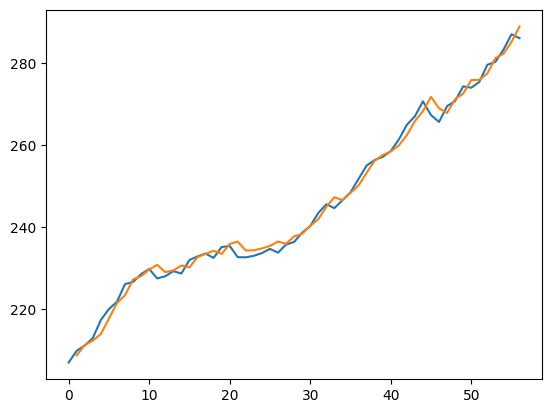

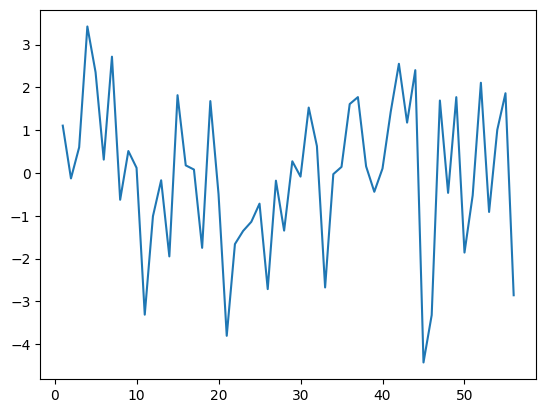

[  0.           1.4389337    1.29787239   1.71464509   4.72030879
   5.97439648   6.33891518   9.23092188   8.34100457   8.85721827
   8.67844396   4.97042666   4.08264336   3.91699005   1.92513475
   3.81801245   3.26220014   2.56250984   0.07856754   1.31521623
   0.16407493  -3.98059837  -5.43220568  -6.47346498  -7.22355129
  -7.61289759  -9.94451489  -9.3718332  -10.1622955   -9.3154158
  -9.12852411  -7.33344941  -6.61524571  -8.96673002  -8.48555132
  -7.94594662  -6.09189993  -4.24407323  -4.30620854  -4.94248784
  -4.95543914  -3.55714645  -1.36689875  -0.69641705   1.53616064
  -3.20956466  -6.31117496  -3.86247527  -4.02796257  -1.86960587
  -3.61392118  -3.62119148  -0.83960079  -1.53359209   0.01705861
   2.3647373    0.        ]


In [ ]:
import pandas as pd
exog_eq1 = np.transpose(np.array([bancariot1,financierat1,cmunicipalest1]))
variables =['bancariot1', 'financierat1', 'cmunicipalest1']
exog_eq1=pd.DataFrame(data = exog_eq1, columns = variables)
exog_eq1=sm.add_constant(exog_eq1)
#print(exog_eq1)
#len(exog_eq1)
#len(bancario)
var_eq1=sm.OLS(bancario[1:56],exog_eq1[1:56]).fit()
print(var_eq1.summary())
print(var_eq1.params)
c10=var_eq1.params[0]
c11=var_eq1.params[1]
c12=var_eq1.params[2]
c13=var_eq1.params[3]
bancario_e = c10+c11*bancariot1 + c12*financierat1+c13*cmunicipalest1
e1_cb = bancario - bancario_e
plt.plot(bancario)
plt.plot(bancario_e)
plt.show()

plt.plot(e1_cb)
plt.show()

#print(bancario[0])
#print(bancario[1:56])
#print(exog_eq1[1:56])

print(bancariodt)


In [ ]:


bancariodt1=np.zeros(57)
for t in range(57):
  t1=t-1
  bancariodt1[t] =bancariodt[t1]
bancariodt1[0]=np.nan

financieradt1=np.zeros(57)
for t in range(57):
  t1=t-1
  financieradt1[t] =financieradt[t1]
financieradt1[0]=np.nan

cmunicipalesdt1=np.zeros(57)
for t in range(57):
  t1=t-1
  cmunicipalesdt1[t] =cmunicipalesdt[t1]
cmunicipalesdt1[0]=np.nan

exog_eq1 = np.transpose(np.array([bancariodt1,financieradt1,cmunicipalesdt1]))
variables =['bancariodt1', 'financieradt1', 'cmunicipalesdt1']
exog_eq1=pd.DataFrame(data = exog_eq1, columns = variables)
exog_eq1=sm.add_constant(exog_eq1)

#print(bancariodt)
#print(bancariodt1)
#print(exog_eq1)

print(bancariodt)


[  0.           1.4389337    1.29787239   1.71464509   4.72030879
   5.97439648   6.33891518   9.23092188   8.34100457   8.85721827
   8.67844396   4.97042666   4.08264336   3.91699005   1.92513475
   3.81801245   3.26220014   2.56250984   0.07856754   1.31521623
   0.16407493  -3.98059837  -5.43220568  -6.47346498  -7.22355129
  -7.61289759  -9.94451489  -9.3718332  -10.1622955   -9.3154158
  -9.12852411  -7.33344941  -6.61524571  -8.96673002  -8.48555132
  -7.94594662  -6.09189993  -4.24407323  -4.30620854  -4.94248784
  -4.95543914  -3.55714645  -1.36689875  -0.69641705   1.53616064
  -3.20956466  -6.31117496  -3.86247527  -4.02796257  -1.86960587
  -3.61392118  -3.62119148  -0.83960079  -1.53359209   0.01705861
   2.3647373    0.        ]


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     145.1
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           5.82e-25
Time:                        23:44:56   Log-Likelihood:                -108.52
No. Observations:                  55   AIC:                             225.0
Df Residuals:                      51   BIC:                             233.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3459      0.539     

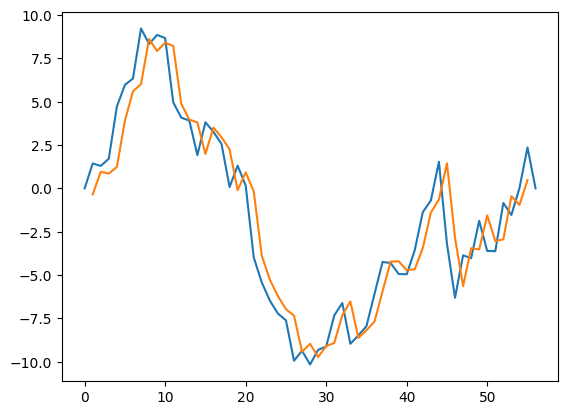

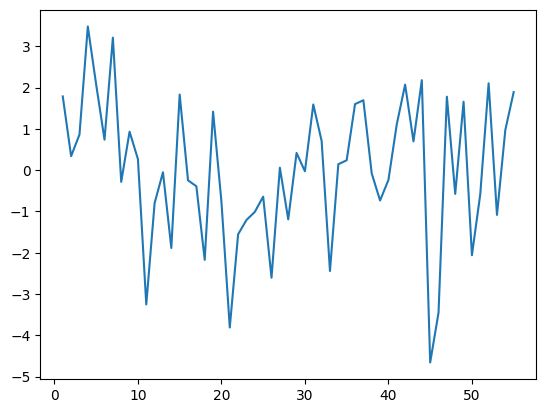

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     105.0
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           8.06e-22
Time:                        23:44:57   Log-Likelihood:                 53.536
No. Observations:                  55   AIC:                            -99.07
Df Residuals:                      51   BIC:                            -91.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0334      0.028     

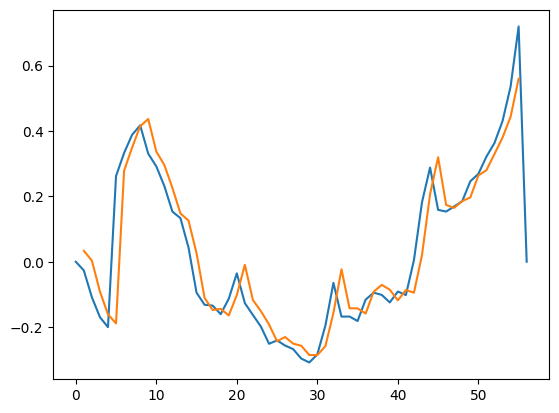

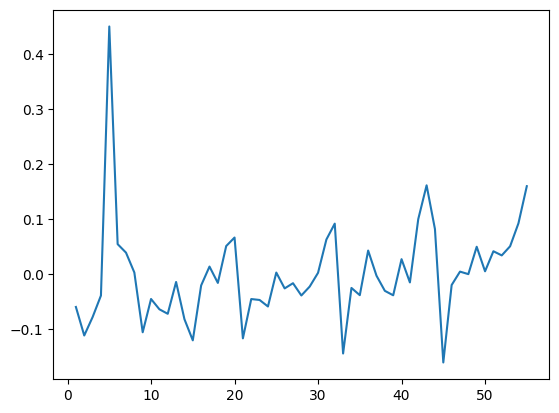

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     169.7
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           1.59e-26
Time:                        23:44:58   Log-Likelihood:                 56.476
No. Observations:                  55   AIC:                            -105.0
Df Residuals:                      51   BIC:                            -96.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0888      0.027     

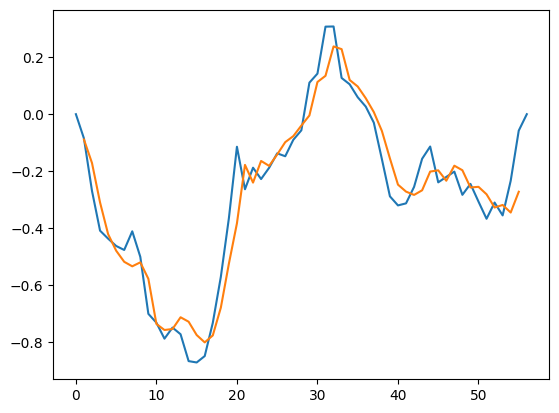

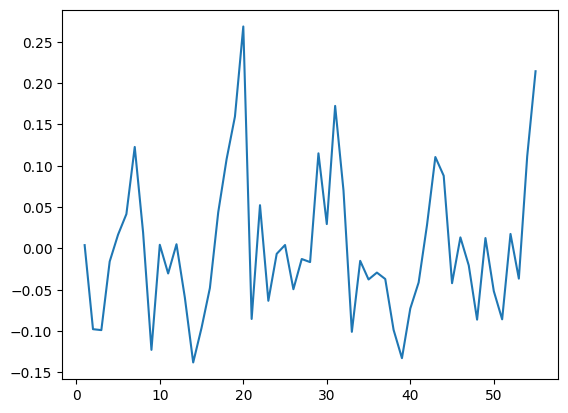

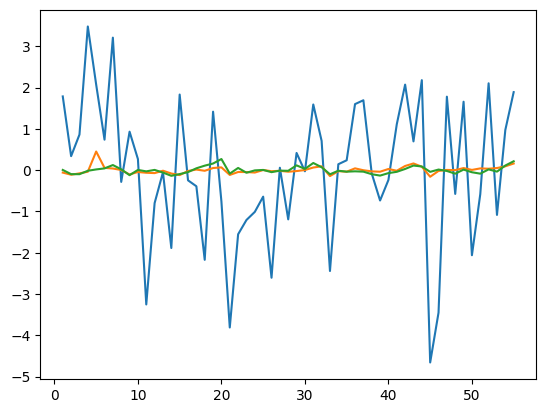

[  0.           1.4389337    1.29787239   1.71464509   4.72030879
   5.97439648   6.33891518   9.23092188   8.34100457   8.85721827
   8.67844396   4.97042666   4.08264336   3.91699005   1.92513475
   3.81801245   3.26220014   2.56250984   0.07856754   1.31521623
   0.16407493  -3.98059837  -5.43220568  -6.47346498  -7.22355129
  -7.61289759  -9.94451489  -9.3718332  -10.1622955   -9.3154158
  -9.12852411  -7.33344941  -6.61524571  -8.96673002  -8.48555132
  -7.94594662  -6.09189993  -4.24407323  -4.30620854  -4.94248784
  -4.95543914  -3.55714645  -1.36689875  -0.69641705   1.53616064
  -3.20956466  -6.31117496  -3.86247527  -4.02796257  -1.86960587
  -3.61392118  -3.62119148  -0.83960079  -1.53359209   0.01705861
   2.3647373    0.        ]


In [ ]:
var_eq1=sm.OLS(bancariodt[1:56],exog_eq1[1:56]).fit()
print(var_eq1.summary())
print(var_eq1.params)
c10=var_eq1.params[0]
c11=var_eq1.params[1]
c12=var_eq1.params[2]
c13=var_eq1.params[3]
bancariodt_e = var_eq1.predict(exog_eq1[1:56])
plt.plot(bancariodt)
plt.plot(bancariodt_e)
plt.show()

e1_cbdt = bancariodt[1:56] - bancariodt_e
plt.plot(e1_cbdt)
plt.show()

var_eq2=sm.OLS(financieradt[1:56],exog_eq1[1:56]).fit()
print(var_eq2.summary())
print(var_eq2.params)
c20=var_eq2.params[0]
c21=var_eq2.params[1]
c22=var_eq2.params[2]
c23=var_eq2.params[3]
financieradt_e = var_eq2.predict(exog_eq1[1:56])
plt.plot(financieradt)
plt.plot(financieradt_e)
plt.show()
e2_cfdt = financieradt[1:56] - financieradt_e
plt.plot(e2_cfdt)
plt.show()

var_eq3=sm.OLS(cmunicipalesdt[1:56],exog_eq1[1:56]).fit()
print(var_eq3.summary())
print(var_eq3.params)
c30=var_eq3.params[0]
c31=var_eq3.params[1]
c32=var_eq3.params[2]
c33=var_eq3.params[3]
cmunicipalesdt_e = var_eq3.predict(exog_eq1[1:56])
plt.plot(cmunicipalesdt)
plt.plot(cmunicipalesdt_e)
plt.show()

e3_cmdt = cmunicipalesdt[1:56] - cmunicipalesdt_e
plt.plot(e3_cmdt)
plt.show()

plt.plot(e1_cbdt)
plt.plot(e2_cfdt)
plt.plot(e3_cmdt)
plt.show()

print(bancariodt)



[  0.           1.4389337    1.29787239   1.71464509   4.72030879
   5.97439648   6.33891518   9.23092188   8.34100457   8.85721827
   8.67844396   4.97042666   4.08264336   3.91699005   1.92513475
   3.81801245   3.26220014   2.56250984   0.07856754   1.31521623
   0.16407493  -3.98059837  -5.43220568  -6.47346498  -7.22355129
  -7.61289759  -9.94451489  -9.3718332  -10.1622955   -9.3154158
  -9.12852411  -7.33344941  -6.61524571  -8.96673002  -8.48555132
  -7.94594662  -6.09189993  -4.24407323  -4.30620854  -4.94248784
  -4.95543914  -3.55714645  -1.36689875  -0.69641705   1.53616064
  -3.20956466  -6.31117496  -3.86247527  -4.02796257  -1.86960587
  -3.61392118  -3.62119148  -0.83960079  -1.53359209   0.01705861
   2.3647373    0.        ]


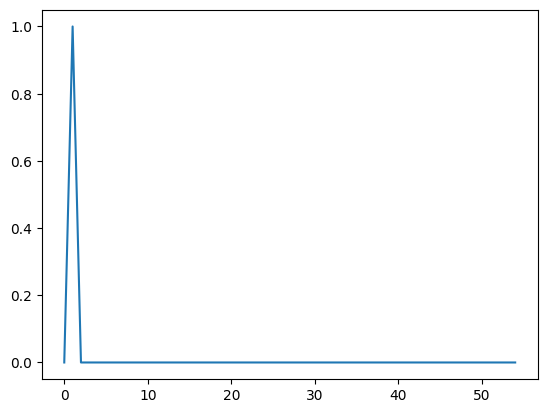

[ 0.          0.65411005 -0.39406332 -0.3315091  -0.27945132 -0.26819484
  0.34251362  0.40109507  0.38314606  0.43513853  0.41209218  0.34027571
  0.26631971  0.11646124  0.09446371  0.03582799 -0.13394722 -0.17935703
 -0.23863162 -0.34991367 -0.38860166 -0.41463365 -0.38385404 -0.43581266
 -0.40646172 -0.45195975 -0.42327486 -0.39008566 -0.39858471 -0.41228636
 -0.49115476 -0.42829701 -0.38172812 -0.18074753 -0.16958261 -0.13650624
 -0.10875216  0.00453199  0.06662568  0.13420684  0.1767304   0.21899345
  0.17747927  0.25143525  0.37598997  0.4370335   0.31319483  0.26067408
  0.23922535  0.28622075  0.30458601  0.3395385   0.40637596  0.37638906
  0.44668532]


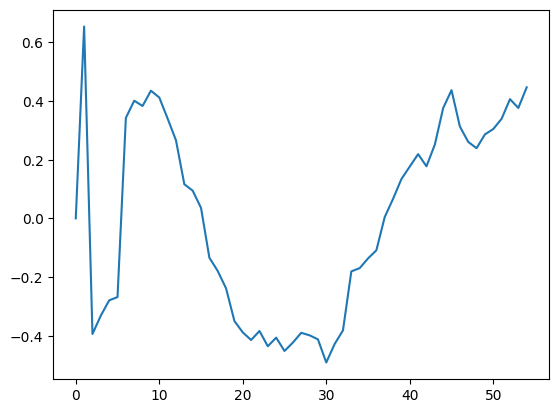

[ 0.          0.13338974  0.03169065  0.02025844  0.01238681  0.01546453
  0.01597731  0.01583265  0.0246231   0.01787222  0.00634067  0.0041784
 -0.00509144 -0.00410388 -0.00586491 -0.01494747 -0.01243821 -0.01202758
 -0.00596998  0.00020075  0.015031    0.02908774  0.01355669  0.01616099
  0.01220393  0.01363286  0.01633313  0.01221136  0.01684371  0.0178676
  0.02984843  0.03243488  0.04590303  0.04753435  0.03302822  0.0327302
  0.03106497  0.03222708  0.03192424  0.02416547  0.01521936  0.01336173
  0.01613573  0.02335118  0.03082258  0.03732474  0.02240563  0.01896762
  0.02417402  0.0190532   0.02503051  0.0186699   0.01507313  0.02315146
  0.01947382]


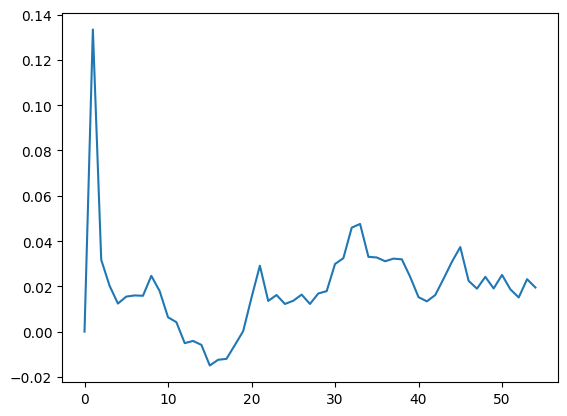

[ 0.          0.01143901 -0.10825058 -0.08044516 -0.06632326 -0.09159427
 -0.0860067  -0.07067044 -0.08980001 -0.05692078 -0.04950272 -0.03510616
  0.01944429  0.02594401  0.02262883  0.04296688  0.00987005  0.01439658
  0.01982658  0.04528725  0.01872622  0.02924286  0.0736159   0.07439976
  0.07009323  0.06268616  0.05281599  0.06911453  0.04600948  0.04497432
  0.02373514  0.01508143 -0.01167265 -0.016864    0.01602816  0.00644592
 -0.0022723  -0.0247153  -0.0415455  -0.03077929 -0.0159776  -0.01195574
 -0.02724624 -0.04926463 -0.04679389 -0.06209153  0.01095865  0.04637601
  0.00518322  0.00547262 -0.02255169  0.00376646  0.00260757 -0.03278389
 -0.01741882]


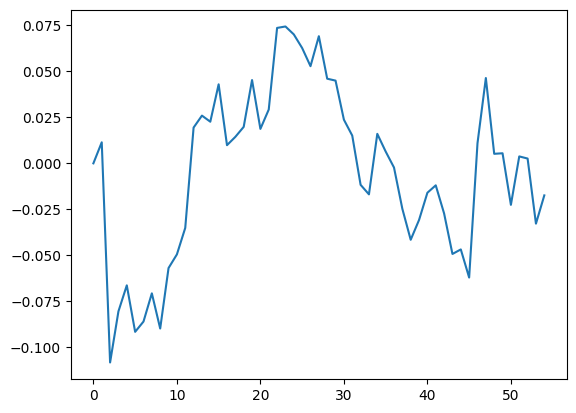

In [ ]:
#IMPULSO RESPUESTA
impulso=1
print(bancariodt)

var_impulso = np.zeros(55)
var_impulso[1] = impulso
#len(var_impulso)
#print(var_impulso)
plt.plot(var_impulso)
plt.show()

bancariodt_r=np.zeros(55)
dbancariodt_r=np.zeros(55)
financieradt_r=np.zeros(55)
dfinancieradt_r=np.zeros(55)
cmunicipalesdt_r=np.zeros(55)
dcmunicipalesdt_r=np.zeros(55)


"""
bancariodt_r[1] = c10+c11*bancariodt_r[0]+c12*financieradt1[1]+c13*cmunicipalesdt1[1]+var_impulso[1]
bancariodt_r[2] = c10+c11*bancariodt_r[1]+c12*financieradt1[2]+c13*cmunicipalesdt1[2]+var_impulso[2]
bancariodt_r[3] = c10+c11*bancariodt_r[2]+c12*financieradt1[3]+c13*cmunicipalesdt1[3]+var_impulso[3]
bancariodt_r[4] = c10+c11*bancariodt_r[3]+c12*financieradt1[4]+c13*cmunicipalesdt1[4]+var_impulso[4]
bancariodt_r[5] = c10+c11*bancariodt_r[4]+c12*financieradt1[5]+c13*cmunicipalesdt1[5]+var_impulso[5]
"""

for t in range(54):
  t1 = t+1
  bancariodt_r[t1] = c10+c11*bancariodt_r[t]+c12*financieradt1[t1]+c13*cmunicipalesdt1[t1]+var_impulso[t1]
  dbancariodt_r[t1] = bancariodt_r[t1] - bancariodt_r[t]
print(dbancariodt_r)
plt.plot(dbancariodt_r)
plt.show()

for t in range(54):
  t1 = t+1
  financieradt_r[t1] = c20+c21*bancariodt[t]+c22*financieradt_r[t]+c23*cmunicipalesdt1[t1]+var_impulso[t1]/10
  dfinancieradt_r[t1] = financieradt_r[t1] - financieradt_r[t]
print(dfinancieradt_r)
plt.plot(dfinancieradt_r)
plt.show()

for t in range(54):
  t1 = t+1
  cmunicipalesdt_r[t1] = c30+c31*bancariodt[t]+c32*financieradt[t1]+c33*cmunicipalesdt_r[t]+var_impulso[t1]/10
  dcmunicipalesdt_r[t1] = cmunicipalesdt_r[t1] - cmunicipalesdt_r[t]
print(dcmunicipalesdt_r)
plt.plot(dcmunicipalesdt_r)
plt.show()



